# 步骤1.1：数据加载与解析

本 Notebook 的目标是实现数据加载与解析部分，对应于 `plan1.md` 中的 `#### 1.1 数据加载与解析`。

我们将使用 `data_loader.py` 中定义的 `DataLoader` 类来完成以下任务：
1. 加载 TSV 格式的图片数据和 JSONL 格式的 Query 数据。
2. 解析 Base64 编码的图片。
3. 统计训练集、验证集和测试集的基本信息。

In [1]:
import sys
import os
# 将 plan1 目录添加到 sys.path
sys.path.append(os.path.abspath('.'))

from data_loader import DataLoader
import json
import logging

# 设置日志
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

## 1. 初始化 DataLoader

首先，我们实例化 `DataLoader`。它会自动配置数据目录路径。

In [2]:
loader = DataLoader()

2025-11-04 11:33:57,697 - INFO - 初始化数据加载器，数据目录: /mnt/d/forCoding_data/Tianchi_MUGE/originalData/Multimodal_Retrieval


## 2. 统计数据集信息

使用 `load_dataset_statistics` 方法来获取每个数据集（训练、验证、测试）的统计信息，这有助于我们了解数据的基本情况，而无需将所有图片加载到内存中。

In [3]:
for split in ['train', 'valid', 'test']:
    try:
        stats = loader.load_dataset_statistics(split=split)
        logger.info(f"{split}集统计结果: {json.dumps(stats, ensure_ascii=False, indent=2)}")
    except Exception as e:
        logger.error(f"统计{split}集信息失败: {e}")

2025-11-04 11:34:05,849 - INFO - 统计train数据集信息
2025-11-04 11:34:05,854 - INFO - 加载train查询数据: /mnt/d/forCoding_data/Tianchi_MUGE/originalData/Multimodal_Retrieval/MR_train_queries.jsonl
加载train查询数据: 248786it [00:00, 275731.80it/s]
2025-11-04 11:34:06,830 - INFO - 成功加载train查询数据，共248786条
2025-11-04 11:34:20,183 - INFO - train数据集统计: {'split': 'train', 'query_statistics': {'query_count': 248786, 'avg_query_length': np.float64(7.404556526492648), 'has_item_ids': True, 'avg_items_per_query': np.float64(1.0061418247007468)}, 'image_count': 129380}
2025-11-04 11:34:20,184 - INFO - train集统计结果: {
  "split": "train",
  "query_statistics": {
    "query_count": 248786,
    "avg_query_length": 7.404556526492648,
    "has_item_ids": true,
    "avg_items_per_query": 1.0061418247007468
  },
  "image_count": 129380
}
2025-11-04 11:34:20,184 - INFO - 统计valid数据集信息
2025-11-04 11:34:20,186 - INFO - 加载valid查询数据: /mnt/d/forCoding_data/Tianchi_MUGE/originalData/Multimodal_Retrieval/MR_valid_queries.jsonl
加载valid

## 3. 验证数据一致性

接下来，我们检查查询（Query）中引用的图片 ID 是否都存在于图片数据集中。这对于确保数据质量至关重要。

In [4]:
for split in ['train', 'valid']:
    try:
        consistency = loader.validate_data_consistency(split=split)
        logger.info(f"{split}集一致性结果: {json.dumps(consistency, ensure_ascii=False, indent=2)}")
    except Exception as e:
        logger.error(f"验证{split}集一致性失败: {e}")

2025-11-04 11:34:39,246 - INFO - 验证train数据集一致性
收集图片ID: 129380it [00:10, 12008.42it/s]
2025-11-04 11:34:50,030 - INFO - 加载train查询数据: /mnt/d/forCoding_data/Tianchi_MUGE/originalData/Multimodal_Retrieval/MR_train_queries.jsonl
加载train查询数据: 248786it [00:00, 316112.57it/s]
2025-11-04 11:34:50,887 - INFO - 成功加载train查询数据，共248786条
验证查询引用: 100%|██████████████████████████████████████████████████████████| 248786/248786 [00:03<00:00, 71673.21it/s]
2025-11-04 11:34:54,369 - INFO - train数据集一致性检查结果: {'total_image_ids': 129380, 'total_item_references': 250314, 'missing_image_ids_count': 0, 'missing_image_ids_sample': [], 'consistency_rate': 1.0}
2025-11-04 11:34:54,388 - INFO - train集一致性结果: {
  "total_image_ids": 129380,
  "total_item_references": 250314,
  "missing_image_ids_count": 0,
  "missing_image_ids_sample": [],
  "consistency_rate": 1.0
}
2025-11-04 11:34:54,388 - INFO - 验证valid数据集一致性
收集图片ID: 29806it [00:02, 10831.90it/s]
2025-11-04 11:34:57,145 - INFO - 加载valid查询数据: /mnt/d/forCoding_data/Tia

## 4. 加载并展示示例数据

为了直观地感受数据，我们加载一小部分验证集数据，并展示一张图片及其相关信息。

2025-11-04 11:38:03,302 - INFO - 加载valid查询数据: /mnt/d/forCoding_data/Tianchi_MUGE/originalData/Multimodal_Retrieval/MR_valid_queries.jsonl
加载valid查询数据: 5008it [00:00, 344040.92it/s]
2025-11-04 11:38:03,325 - INFO - 成功加载valid查询数据，共5008条
2025-11-04 11:38:03,342 - INFO - 批量加载valid图片数据: /mnt/d/forCoding_data/Tianchi_MUGE/originalData/Multimodal_Retrieval/MR_valid_imgs.tsv


验证集查询示例:
   query_id query_text                                           item_ids
0    248816      圣诞 抱枕  [1006938, 561749, 936929, 286314, 141999, 183846]
1    248859    德方焕颜美即露   [665851, 157973, 576313, 102370, 104367, 950760]
2    248871      荷叶边花瓶           [160459, 666622, 637011, 783255, 178679]
3    248898        荣光二  [953630, 778778, 817632, 930027, 888130, 1097258]
4    248931      32不粘锅   [227953, 349934, 646440, 204288, 941660, 425873]


加载valid图片数据:  90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:00<00:00, 121.68it/s]
2025-11-04 11:38:06,171 - INFO - 已加载10张图片到内存
2025-11-04 11:38:06,172 - INFO - 成功创建valid图片映射字典，共10张图片
2025-11-04 11:38:06,172 - INFO - 成功加载10张验证集图片



显示图片: 1000002


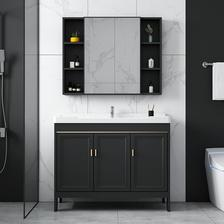

In [5]:
# 加载验证集的查询
valid_queries_df = loader.load_queries(split='valid')
print("验证集查询示例:")
print(valid_queries_df.head())

# 加载10张验证集图片作为示例
img_dict = loader.create_img_id_to_image_dict(split='valid', max_samples=10)
logger.info(f"成功加载{len(img_dict)}张验证集图片")

# 展示一张图片
if img_dict:
    sample_img_id = list(img_dict.keys())[0]
    sample_img = img_dict[sample_img_id]
    if sample_img:
        print(f"\n显示图片: {sample_img_id}")
        display(sample_img)
    else:
        print(f"图片 {sample_img_id} 数据为空。")
else:
    print("未能加载任何示例图片。")